In [8]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F
from IPython import display
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
     

In [2]:
nPerClust = 100
blur = 1

A = [  1,  3 ]
B = [  1, -2 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

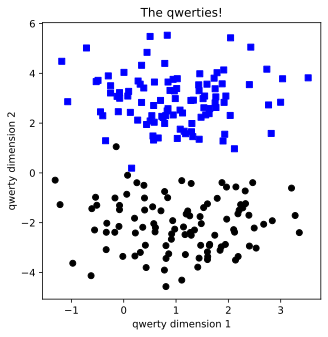

In [3]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()
     


In [13]:
class ANN(nn.Module):
    def __init__(self,nUnits,nLayers):
        super().__init__()
        self.layers=nn.ModuleDict()
        self.nLayers=nLayers
        
        self.layers['input']=nn.Linear(2,nUnits)
        for i in range(nLayers):
            self.layers[f'hidden{i}']=nn.Linear(nUnits,nUnits)
        self.layers['output']=nn.Linear(nUnits,1)
    def forward(self,x):
        x=self.layers['input'](x)
        
        for i in range(self.nLayers):
            x=F.relu(self.layers[f'hidden{i}'](x))
            
        x=self.layers['output'](x)
        
        return x
    
    
    
    
    

In [17]:
def trainTheModel(themodel):    
    learningRate=0.01
    lossfun=nn.BCEWithLogitsLoss()
    optimizer=torch.optim.SGD(themodel.parameters(),lr=0.01)
    losses=torch.zeros(numepoches)
    for epochi in range(numepoches):
        yHat=themodel(data)
        loss=lossfun(yHat,labels)
        losses[epochi]=loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    predictions=themodel(data)
    acc=100*torch.mean(((predictions>0.5)==labels).float())
    nParams=sum(p.numel() for p in themodel.parameters() if p.requires_grad)
    return acc,nParams

In [18]:
nUnitsPerLayer=16
nLayers=1
net=ANN(nUnitsPerLayer,nLayers)
net

ANN(
  (layers): ModuleDict(
    (input): Linear(in_features=2, out_features=16, bias=True)
    (hidden0): Linear(in_features=16, out_features=16, bias=True)
    (output): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [19]:
numepoches=2500
acc,nP=trainTheModel(net)
print(acc,nP)

tensor(99.5000) 337


In [25]:
def createANNmodel(learningRate):
    class ANN(nn.Module):
        def __init__(self):
            super().__init__()
            self.input=nn.Linear(2,16)
            self.hidden=nn.Linear(16,1)
            self.output=nn.Linear(1,1)
            
        def forward(self,x):
            x=self.input(x)
            x=F.relu(x)
            x=self.hidden(x)
            x=F.relu(x)
            x=self.output(x)
            x=torch.sigmoid(x)
            return x
        
    ANNclassify=ANN()
    lossfun=nn.BCELoss()
    optimizer=torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)
    return ANNclassify,lossfun,optimizer

In [1]:
numepochs=500
def trainModel():
    trainAcc=[]
    testAcc=[]
    losses=[]
    for epochi in range(numepochs):
        batchAcc=[]
        batchLoss=[]
        for X,y in train_loader:
            yHat=ANNiris(X)
            loss=lossfun(yHat,y)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            batchAcc.append(100*torch.mean(((yHat>0.5)==y).float()).item())
            batchLoss.append(loss.item())
            
        trainAcc.append(np.mean(batchAcc))
        losses.append(np.mean(batchLoss))
        
        X,y=next(iter(test_loader))
        
        testAcc.append(100*torch.mean((yHat>0.5)==y).float()).item())
    return trainAcc,testAcc,losses
            

SyntaxError: unmatched ')' (2241915024.py, line 25)

final accuracy : 99.00


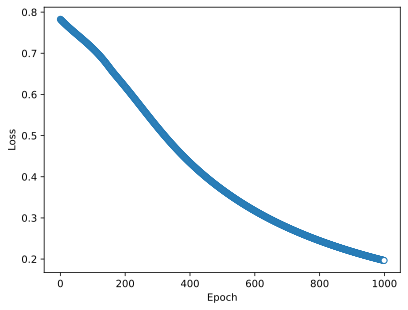

In [28]:
ANNclassify,lossfun,optimizer=createANNmodel(0.01)
losses,predictions,totalacc=trainTheModel(ANNclassify)
print(f'final accuracy : {totalacc:.2f}')
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=0.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()